# Compatibility Checker - Demo 

In this notebook we showcase simple routines that check for compatibility of a given input graph with Rydberg quantum hardware. 
For the union-jack lattice, we distinguish between three types of nodes: 
* Corner nodes with maximum degree of 3. 
* Boundary nodes with maximum degree of 5. 
* Bulk nodes with maximum degree of 8. 

## Imports

In [1]:
# necessary imports
import networkx as nx
import matplotlib.pyplot as plt
import copy

# local imports 
from utils_checker import vertices_to_graph, check_compatibility

# auto reload external files, so that we can edit the external .py file and immediately see the changes here
%load_ext autoreload
%autoreload 2

## Setting up reference base graph

In [2]:
# specify the base graph 
atom_positions = [(0,0), (0,1), (0,2), (1,0), (1, 1), (1, 2), (2, 0), (2, 1), (2,2)]
lattice_width = max([x for x,y in atom_positions]) + 1
lattice_height = max([y for x,y in atom_positions]) + 1

# get UD graph 
node_labels = [y*lattice_width + x for x,y in atom_positions]
position_map = dict(zip(node_labels, atom_positions)) 
graph_base = vertices_to_graph(atom_positions)
mapping = dict(zip(list(graph_base.nodes()), node_labels)) # node relabeling
graph_base = nx.relabel_nodes(graph_base, mapping)

# print mapping
print('Node label mapping:', position_map)

Node label mapping: {0: (0, 0), 3: (0, 1), 6: (0, 2), 1: (1, 0), 4: (1, 1), 7: (1, 2), 2: (2, 0), 5: (2, 1), 8: (2, 2)}


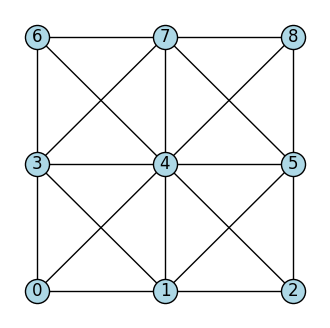

In [3]:
# plot base graph 
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(graph_base, pos=position_map, ax=ax, with_labels=True, node_color='lightblue', edgecolors='k')
plt.show()

## Example compatibility checks 

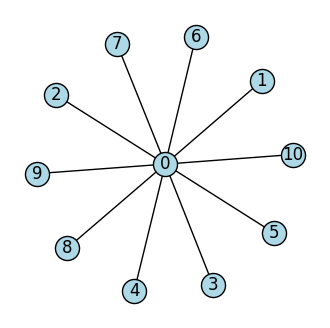

Number of triangles is 0.


In [4]:
# generate star graph 
test_graph = nx.star_graph(10)

# plot graph 
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(test_graph, with_labels=True, node_color='lightblue', edgecolors='k')
plt.show()

# get (local) number of triangles 
number_triangles = nx.triangles(test_graph, 0)
print(f'Number of triangles is {number_triangles}.')

In [5]:
# perform HW check (compatibility with UJ connectivity)
check_hw = check_compatibility(test_graph)
print('Is the given graph potentially compatible with QPU?', check_hw)

Maximum degrees found: [10]
Is the given graph potentially compatible with QPU? False


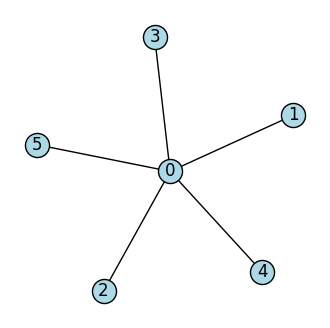

Number of triangles is 0.


In [6]:
# generate star graph 
test_graph = nx.star_graph(5)

# plot graph 
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(test_graph, with_labels=True, node_color='lightblue', edgecolors='k')
plt.show()

# get (local) number of triangles 
number_triangles = nx.triangles(test_graph, 0)
print(f'Number of triangles is {number_triangles}.')

In [7]:
# perform HW check (compatibility with UJ connectivity)
check_hw = check_compatibility(test_graph)
print('Is the given graph potentially compatible with QPU?', check_hw)

Maximum degrees found: [5]
Number of triangles found: 0
Is the given graph potentially compatible with QPU? False


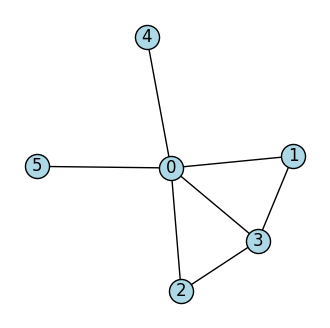

Number of triangles is 2.


In [8]:
# generate test graph 
test_graph.add_edge(1, 3)
test_graph.add_edge(2, 3)

# plot graph 
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(test_graph, with_labels=True, node_color='lightblue', edgecolors='k')
plt.show()

# get (local) number of triangles 
number_triangles = nx.triangles(test_graph, 0)
print(f'Number of triangles is {number_triangles}.')

In [9]:
# perform HW check (compatibility with UJ connectivity)
check_hw = check_compatibility(test_graph)
print('Is the given graph potentially compatible with QPU?', check_hw)

Maximum degrees found: [5]
Number of triangles found: 2
Is the given graph potentially compatible with QPU? True


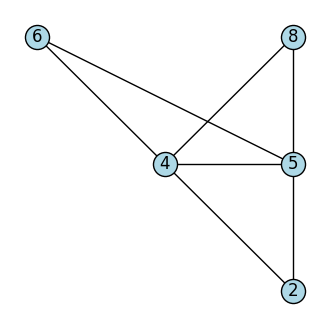

In [10]:
# check special case
example_combo = (0,1,3,7) 
# node removal
test_graph = copy.deepcopy(graph_base)
for node in example_combo:
    test_graph.remove_node(node)

# add non-local edge
test_graph.add_edges_from([(5,6)])

# remove boundary node from position map 
map_check = copy.deepcopy(position_map)
for node in example_combo:
    map_check.pop(node);

# plot graph 
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(test_graph, pos=map_check, ax=ax, with_labels=True, node_color='lightblue', edgecolors='k')
plt.show()

In [11]:
# perform HW check (compatibility with UJ connectivity)
check_hw = check_compatibility(test_graph)
print('Is the given graph potentially compatible with QPU?', check_hw)

Maximum degrees found: [4, 4]
Number of triangles found: 3
Number of triangles found: 3
Is the given graph potentially compatible with QPU? True
